“Modelo de lenguaje utilizando RoBERTuito, para identificar tweets con contenido de violencia política de género hacia las asambleístas electas en Ecuador para el periodo 2021-2025”

Instalación de dependencias

In [ ]:
!pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!pip install pysentimiento

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=a7172c9b279319883ea353aa601d3e1729c50d33e2e023c9fd7a8aae9af84a4a
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


Inicio sesión

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
    
Token: 
Add token as git credential? (Y/n) Y
Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper

In [ ]:
!git config --global user.email "edmundo.j.pezantes@unl.edu.ec"
!git config --global user.name "JPezantes"

In [ ]:
!apt install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


Conexión a Google Drive

In [ ]:
import transformers
import pandas as pd
print(transformers.__version__)

4.25.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Visualización de Datos

In [ ]:
datos=pd.read_csv('/content/drive/MyDrive/ViolenciaPoíticaDeGénero/Datos_Balanceados_Oversampling.csv')
datos.dropna(inplace = True)
datos

,id,text,task
0,0,las glosas de muñoz que se quede para financia...,no violencia política de género
1,1,usted pavel un gran alcalde,no violencia política de género
2,2,dígame una ley que hacen desde la asamblea par...,no violencia política de género
3,3,el dinero de los afiliados al iess que desapar...,no violencia política de género
4,4,de este caso me estaba acordando,no violencia política de género
...,...,...,...
32085,15610,que sabes de riesgo lo que sabes es de dirigen...,violencia política de género
32086,8318,cuanto es tu lleve ratas,violencia política de género
32087,18093,jajajaja tarada estudia cómo puedes ser asambl...,violencia política de género
32088,4392,ridícula fue tu partido político el mayor ladr...,violencia política de género


In [ ]:
print("numero de tweets pertenecen a las classes violencia política de género and no violencia política de género")
datos['task'].value_counts()

numero de tweets pertenecen a las classes violencia política de género and no violencia política de género


no violencia política de género    16045
violencia política de género       16045
Name: task, dtype: int64

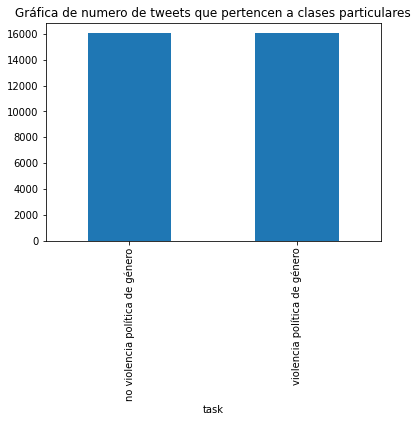

In [ ]:
datos.groupby('task')['id'].count().plot(kind='bar',title='Gráfica de numero de tweets que pertencen a clases particulares')

In [ ]:
df = pd.DataFrame(datos)

In [ ]:
df['task'] = df.groupby('task')['task'].transform(lambda x: x.replace('no violencia política de género', 0))
df['task'] = df.groupby('task')['task'].transform(lambda x: x.replace('violencia política de género', 1))

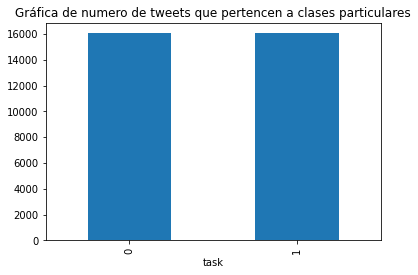

In [ ]:
datos.groupby('task')['id'].count().plot(kind='bar',title='Gráfica de numero de tweets que pertencen a clases particulares')

Carga y visualización de dataset

In [ ]:
from datasets import load_dataset, list_datasets, load_metric,DatasetDict

In [ ]:
dataset=load_dataset('csv',data_files='/content/drive/MyDrive/ViolenciaPoíticaDeGénero/Datos_Balanceados_Oversampling.csv')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-74a0a51f5b294d49/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

División de dataset

In [ ]:
train_devtest = dataset['train'].train_test_split(shuffle = True, seed = 200, test_size=0.1)
posts_dev_test = train_devtest['test'].train_test_split(shuffle = True, seed = 200, test_size=0.50)
dataset = DatasetDict({
    'train': train_devtest['train'],
    'validation': posts_dev_test['test'],
    'test': posts_dev_test['train']})

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'task'],
        num_rows: 28881
    })
    validation: Dataset({
        features: ['id', 'text', 'task'],
        num_rows: 1605
    })
    test: Dataset({
        features: ['id', 'text', 'task'],
        num_rows: 1604
    })
})

Ejemplificación

In [ ]:
dataset['train'][1]

{'id': 1732,
 'text': 'si un odiador se expresa de las mujeres como gordita horrorosa no será que devuelva los millones de una refinería fantasma mamerta',
 'task': 'violencia política de género'}

In [ ]:
dataset['validation'][2]

{'id': 6710,
 'text': 'alexandra arce la reina de la mafia en duran',
 'task': 'violencia política de género'}

In [ ]:
dataset['test'][3]

{'id': 9657,
 'text': 'no seas hipócrita cínica regionalista',
 'task': 'violencia política de género'}

Conversión con Pandas

In [ ]:
dataset.set_format('pandas')
df_train = dataset['train'][:]

In [ ]:
df_train.to_csv('/content/drive/MyDrive/ViolenciaPoíticaDeGénero/train.csv',index=False)

In [ ]:
dataset.set_format('pandas')
df_test = dataset['test'][:]

In [ ]:
df_test.to_csv('/content/drive/MyDrive/ViolenciaPoíticaDeGénero/test.csv',index=False)

In [ ]:
dataset.set_format('pandas')
df_validation = dataset['validation'][:]

In [ ]:
df_validation.to_csv('/content/drive/MyDrive/ViolenciaPoíticaDeGénero/validation.csv',index=False)

In [ ]:
df_train['task'].value_counts()

no violencia política de género    14443
violencia política de género       14438
Name: task, dtype: int64

In [ ]:
dataset.reset_format()

In [ ]:
dataset.unique('task')

Flattening the indices:   0%|          | 0/29 [00:00<?, ?ba/s]

Flattening the indices:   0%|          | 0/2 [00:00<?, ?ba/s]

Flattening the indices:   0%|          | 0/2 [00:00<?, ?ba/s]

{'train': ['no violencia política de género', 'violencia política de género'],
 'validation': ['violencia política de género',
  'no violencia política de género'],
 'test': ['violencia política de género', 'no violencia política de género']}

In [ ]:
num_labels = len(dataset['train'].unique('task'))

In [ ]:
num_labels

2

Tokenizar

In [ ]:
from pysentimiento.preprocessing import preprocess_tweet
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('pysentimiento/robertuito-base-cased')

model = AutoModelForSequenceClassification.from_pretrained("pysentimiento/robertuito-base-cased", num_labels=num_labels)

Downloading:   0%|          | 0.00/319 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/828k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/677 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/435M [00:00<?, ?B/s]

Some weights of the model checkpoint at pysentimiento/robertuito-base-cased were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pysentimiento/robertuito-base-cased and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.w

Selección d métrica

In [ ]:
metric = load_metric("accuracy")

<ipython-input-40-21f3ecd7ee32>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
metric

Metric(name: "accuracy", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = datasets.load_metric("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
        {'accuracy': 0.5}

   

In [ ]:
import numpy as np
fake_preds=np.random.randint(0,2,size=(64,))
fake_labels=np.random.randint(0,2,size=(64,))

metric.compute(predictions=fake_preds,references=fake_labels)

{'accuracy': 0.40625}

Cambio de str a int

In [ ]:
def set_label(examples):
  if examples["task"] == "no violencia política de género":
    label=0
  else:
    label=1
  return {"labels": label}
  #no violencia política de género=0
  #violencia política de género=1

In [ ]:
dataset=dataset.map(set_label)

  0%|          | 0/28881 [00:00<?, ?ex/s]

  0%|          | 0/1605 [00:00<?, ?ex/s]

  0%|          | 0/1604 [00:00<?, ?ex/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'task', 'labels'],
        num_rows: 28881
    })
    validation: Dataset({
        features: ['id', 'text', 'task', 'labels'],
        num_rows: 1605
    })
    test: Dataset({
        features: ['id', 'text', 'task', 'labels'],
        num_rows: 1604
    })
})

In [ ]:
def encode(examples):
  return tokenizer(examples['text'],padding=True,truncation=True)

In [ ]:
dataset=dataset.map(encode,batched=True,remove_columns=['id',	'text',	'task'])

  0%|          | 0/29 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 28881
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1605
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1604
    })
})

In [ ]:
dataset['train'][2]

{'labels': 1,
 'input_ids': [0,
  10206,
  461,
  1484,
  4784,
  435,
  124,
  560,
  527,
  9704,
  88,
  6128,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

Cargar el modelo preentrenado

In [ ]:
model_checkpoint = "pysentimiento/robertuito-base-cased"

**FineTuning del Modelo**

In [ ]:
def compute_metrics(eval_pred):
  predictions,labels=eval_pred
  predictions=np.argmax(predictions, axis=1)
  return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import TrainingArguments, Trainer

In [ ]:
metric_name = 'accuracy'
model_name ='pysentimiento/robertuito-base-cased'

args = TrainingArguments(
    model_name,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_eval_batch_size=8,
    per_device_train_batch_size=8,
    num_train_epochs=20,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    push_to_hub=True,
)

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['validation'],
    tokenizer = tokenizer,
    compute_metrics=compute_metrics
)

/usr/local/lib/python3.8/dist-packages/huggingface_hub/repository.py:725: FutureWarning: Creating a repository through 'clone_from' is deprecated and will be removed in v0.12. Please create the repository first using `create_repo(..., exists_ok=True)`.
  warnings.warn(
Cloning https://huggingface.co/JosePezantes/robertuito-base-cased into local empty directory.


Entrenamiento

In [ ]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 1605
  Batch size = 8
You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'eval_loss': 0.6861903667449951,
 'eval_accuracy': 0.5433021806853583,
 'eval_runtime': 10.8714,
 'eval_samples_per_second': 147.635,
 'eval_steps_per_second': 18.489}

In [ ]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 28881
  Num Epochs = 20
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 72220
  Number of trainable parameters = 108788738


Epoch,Training Loss,Validation Loss,Accuracy
1,0.255700,0.264987,0.938318
2,0.154300,0.176235,0.963240
3,0.079200,0.195903,0.960125
4,0.056500,0.210611,0.966978
5,0.050700,0.259719,0.966355
6,0.029700,0.276091,0.968847
7,0.053100,0.233631,0.951402
8,0.166000,0.224946,0.968847
9,0.011200,0.241625,0.971963
10,0.012900,0.284010,0.971340


***** Running Evaluation *****
  Num examples = 1605
  Batch size = 8


Saving model checkpoint to pysentimiento/robertuito-base-cased/checkpoint-3611
Configuration saved in pysentimiento/robertuito-base-cased/checkpoint-3611/config.json
Model weights saved in pysentimiento/robertuito-base-cased/checkpoint-3611/pytorch_model.bin
tokenizer config file saved in pysentimiento/robertuito-base-cased/checkpoint-3611/tokenizer_config.json
Special tokens file saved in pysentimiento/robertuito-base-cased/checkpoint-3611/special_tokens_map.json
tokenizer config file saved in pysentimiento/robertuito-base-cased/tokenizer_config.json
Special tokens file saved in pysentimiento/robertuito-base-cased/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1605
  Batch size = 8
Saving model checkpoint to pysentimiento/robertuito-base-cased/checkpoint-7222
Configuration saved in pysentimiento/robertuito-base-cased/checkpoint-7222/config.json
Model weights saved in pysentimiento/robertuito-base-cased/checkpoint-7222/pytorch_model.bin
tokenizer config file sa

TrainOutput(global_step=72220, training_loss=0.050734252192029435, metrics={'train_runtime': 10173.804, 'train_samples_per_second': 56.775, 'train_steps_per_second': 7.099, 'total_flos': 2.052136063780026e+16, 'train_loss': 0.050734252192029435, 'epoch': 20.0})

In [ ]:
trainer.evaluate(eval_dataset=dataset['test'])

***** Running Evaluation *****
  Num examples = 1604
  Batch size = 8


{'eval_loss': 0.30062195658683777,
 'eval_accuracy': 0.9738154613466334,
 'eval_runtime': 6.5998,
 'eval_samples_per_second': 243.038,
 'eval_steps_per_second': 30.456,
 'epoch': 20.0}

In [ ]:
model.save_pretrained("/content/drive/MyDrive/ViolenciaPoíticaDeGénero")

Configuration saved in /content/drive/MyDrive/ViolenciaPoíticaDeGénero/config.json
Model weights saved in /content/drive/MyDrive/ViolenciaPoíticaDeGénero/pytorch_model.bin


In [ ]:
tokenizer.save_pretrained("/content/drive/MyDrive/ViolenciaPoíticaDeGénero")

tokenizer config file saved in /content/drive/MyDrive/ViolenciaPoíticaDeGénero/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/ViolenciaPoíticaDeGénero/special_tokens_map.json


('/content/drive/MyDrive/ViolenciaPoíticaDeGénero/tokenizer_config.json',
 '/content/drive/MyDrive/ViolenciaPoíticaDeGénero/special_tokens_map.json',
 '/content/drive/MyDrive/ViolenciaPoíticaDeGénero/tokenizer.json')

In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
trainer.push_to_hub()

Saving model checkpoint to pysentimiento/robertuito-base-cased
Configuration saved in pysentimiento/robertuito-base-cased/config.json
Model weights saved in pysentimiento/robertuito-base-cased/pytorch_model.bin
tokenizer config file saved in pysentimiento/robertuito-base-cased/tokenizer_config.json
Special tokens file saved in pysentimiento/robertuito-base-cased/special_tokens_map.json
Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 3.30k/415M [00:00<?, ?B/s]

Upload file runs/Jan08_22-04-09_92011fcf9bdf/events.out.tfevents.1673215499.92011fcf9bdf.322.0:  10%|9        …

Upload file runs/Jan08_22-04-09_92011fcf9bdf/events.out.tfevents.1673225725.92011fcf9bdf.322.2: 100%|#########…

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/JosePezantes/robertuito-base-cased
   b5fafa4..db190db  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/JosePezantes/robertuito-base-cased
   b5fafa4..db190db  main -> main

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Text Classification', 'type': 'text-classification'}, 'metrics': [{'name': 'Accuracy', 'type': 'accuracy', 'value': 0.9738154613466334}]}
To https://huggingface.co/JosePezantes/robertuito-base-cased
   db190db..3333a44  main -> main

   db190db..3333a44  main -> main



'https://huggingface.co/JosePezantes/robertuito-base-cased/commit/db190db10343db503656d79f2909e09a0eb0e48d'

In [ ]:
from transformers import AutoModelForSequenceClassification

model_name = "JosePezantes/robertuito-base-cased"
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [ ]:
from transformers import pipeline

classifier = pipeline("text-classification", model=model_name)

In [ ]:
#no violencia politica de genero=0
#violencia politica de genero=1
classifier("sabe si pabel ya pagó la glosa", return_all_scores=True)

[[{'label': 'no violencia política de género', 'score': 0.9999978542327881},
  {'label': 'violencia política de género', 'score': 2.1980142719257856e-06}]]

In [ ]:
model.config.label2id = {"no violencia política de género": 0, "violencia política de género": 1}

In [ ]:
model.config.id2label = {0: "no violencia política de género", 1: "violencia política de género"}

In [ ]:
!git config --global user.email "edmundo.j.pezantes@unl.edu.ec"
!git config --global user.name "JPezantes"

In [ ]:
model.config.push_to_hub("JosePezantes/robertuito-base-cased")

CommitInfo(commit_url='https://huggingface.co/JosePezantes/robertuito-base-cased/commit/25d9331731c4d7a3e9568db3ad09f10515ae6c9e', commit_message='Upload config', commit_description='', oid='25d9331731c4d7a3e9568db3ad09f10515ae6c9e', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
classifier = pipeline("text-classification", model=model_name)

classifier("My name is Sylvain. [SEP] My name is Lysandre")

Downloading:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

[{'label': 'no violencia política de género', 'score': 0.9999969005584717}]

In [ ]:
classifier("sabe si pabel ya pagó la glosa")

[{'label': 'no violencia política de género', 'score': 0.9999978542327881}]

In [ ]:
classifier("sinvergüenza devuelva lo rovado")

[{'label': 'violencia política de género', 'score': 0.9999977350234985}]

In [ ]:
classifier("pobre payasa lo peor es que cita al delincuente prófugo")

[{'label': 'violencia política de género', 'score': 0.999997615814209}]

In [ ]:
classifier("esta mujer es una rata sinvergüenza los borregos tienen lo que se merecen por votar por estas escorias robolucionarios narcorreismo unes")

[{'label': 'violencia política de género', 'score': 0.999997615814209}]

In [ ]:
classifier("buen provecho con la conciencia tranquila")

[{'label': 'no violencia política de género', 'score': 0.9999977350234985}]

In [ ]:
classifier("lo hicimos se decían prohibido olvidar")

[{'label': 'no violencia política de género', 'score': 0.9999978542327881}]

In [ ]:
classifier("que investiguen el s la muerte de quinto pazmiño gnrl gabela tambien")

[{'label': 'no violencia política de género', 'score': 0.9999978542327881}]